In [18]:
import pandas as pd
import matplotlib.pyplot as plt

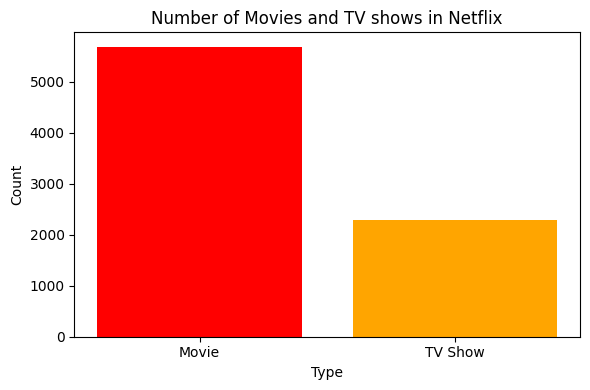

In [34]:
# read the data
df= pd.read_csv('netflix_titles.csv')

# clean data
df= df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts= df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=["red", 'orange'])
plt.title("Number of Movies and TV shows in Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


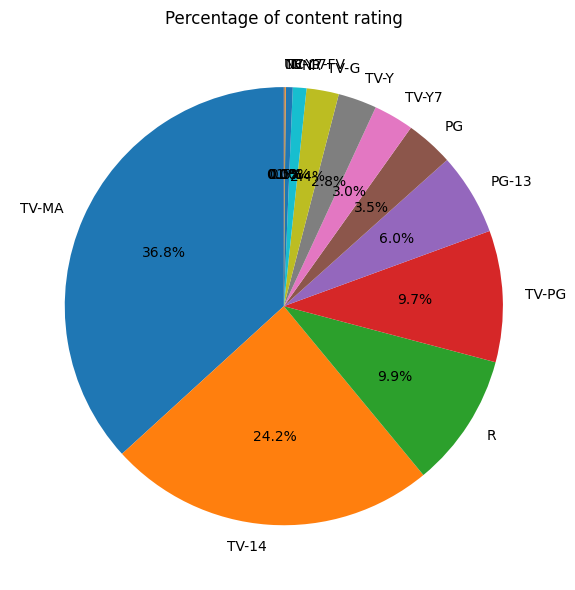

In [20]:
rating_counts= df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of content rating")
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

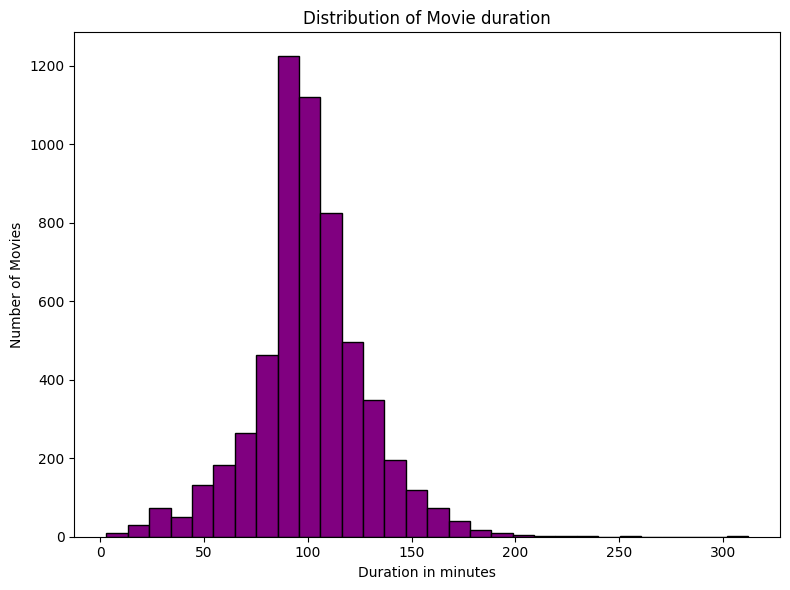

In [21]:
movie_df= df[df['type'] == "Movie"].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

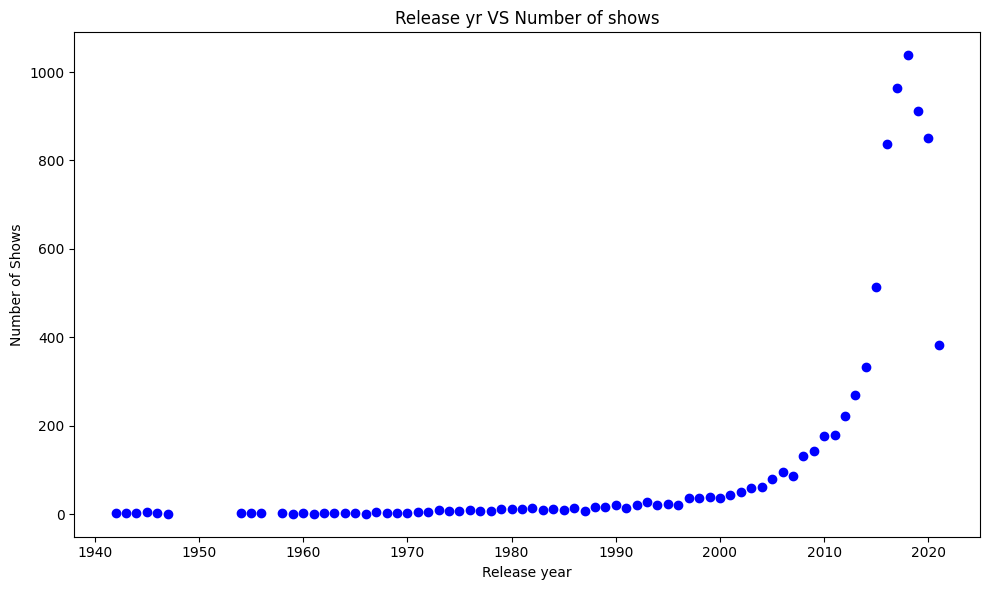

In [22]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='blue')
plt.title("Release yr VS Number of shows")
plt.xlabel('Release year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_vs_shows_scatter.png')
plt.show()

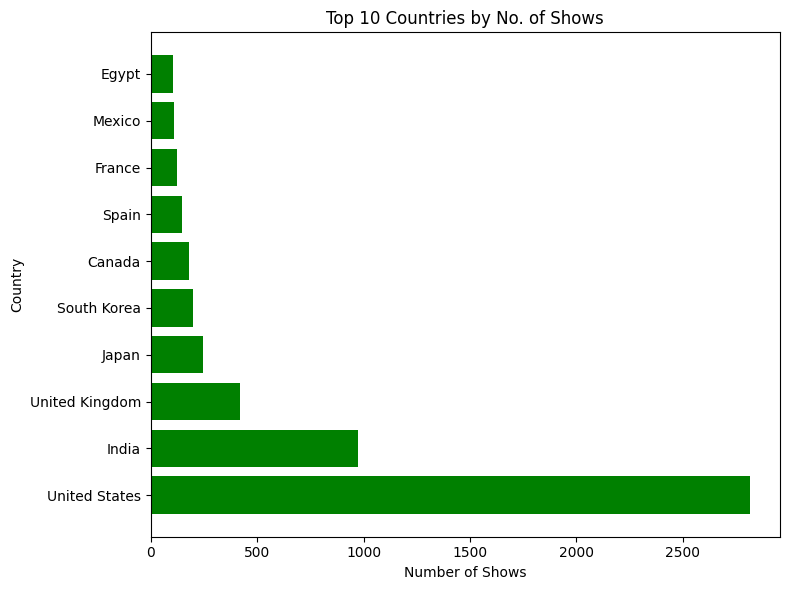

In [24]:
country_counts= df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='green')
plt.title("Top 10 Countries by No. of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_countries_barh.png")
plt.show()

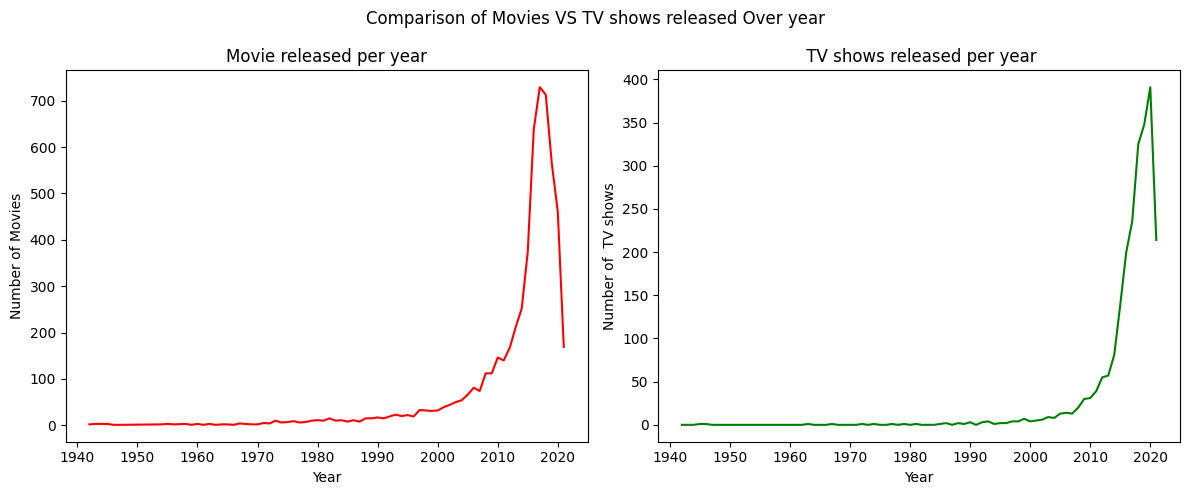

In [36]:
content_by_year= df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax=plt.subplots(1,2, figsize=(12,5))

# First subplots: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='red')
ax[0].set_title("Movie released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# Second subplots: TV shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='green')
ax[1].set_title(" TV shows released per year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of  TV shows")

fig.suptitle("Comparison of Movies VS TV shows released Over year")
plt.tight_layout()
plt.savefig('movies_vs_TVshows.png')
plt.show()